In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [3]:
#importing the dataset

data = pd.read_csv("heart.csv")
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:13]
y = data["target"]

# splitting X and y into training and testing sets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [90]:
X_train.shape

(212, 13)

In [53]:
#Implementing Decision Trees
from sklearn.tree import DecisionTreeClassifier

best_accuracy = []

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train) 
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

print("Accuracy for Decision Trees for train:",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy for Decision Trees:",accuracy_score(y_test,y_pred_test)*100)

best_accuracy.append(accuracy_score(y_test,y_pred_test)*100)

Accuracy for Decision Trees for train: 100.0
Accuracy for Decision Trees: 70.32967032967034


In [74]:
#Cross Validation for Decision Trees with different folds

folds = list(range(2,12,2))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []

for j in range(len(folds)):
    print("Cross validation for folds : ", folds[j])
    score = cross_val_score(estimator =DecisionTreeClassifier(),X = X_train, y = y_train, cv = folds[j])
        
    mean_accuracy_folds.append(score.mean()*100)
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []

Cross validation for folds :  2
Cross validation for folds :  4
Cross validation for folds :  6
Cross validation for folds :  8
Cross validation for folds :  10


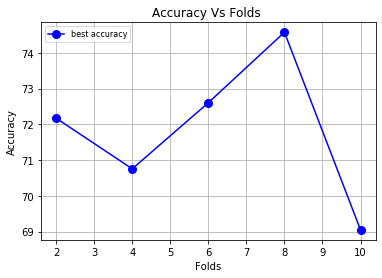

In [76]:
plt.plot(folds , mean_accuracy_kernel_folds, marker ='o', markersize = 8 ,  color ='blue',label='best accuracy')

plt.title("Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

In [42]:
#Implementing decision tree choosing the best parameters
from sklearn.model_selection import GridSearchCV

deci_tree = DecisionTreeClassifier()
param_grid = {"criterion": ['entropy', 'gini'],
              "min_samples_split": [5,10,15],
              "max_depth": [2,3,5],
              "min_samples_leaf": [5,10,15],
              "max_leaf_nodes": [5,10,15],
              }

CV_dt = GridSearchCV(estimator=deci_tree, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
CV_dt.best_params_

C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [56]:
DT_param_tuning = DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=15,min_samples_leaf=5,min_samples_split=10)
DT_param_tuning.fit(X_train, y_train) 

print("Accuracy for Decision Trees after parameter tuning for train:",DT_param_tuning.score(X_train,y_train)*100)
print("Accuracy for Decision Trees after parameter tuning for test:",DT_param_tuning.score(X_test,y_test)*100)

best_accuracy.append(DT_param_tuning.score(X_test,y_test)*100)

Accuracy for Decision Trees after parameter tuning for train: 88.67924528301887
Accuracy for Decision Trees after parameter tuning for test: 72.52747252747253


In [77]:
#Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier() 
random_forest.fit(X_train,y_train)
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

print("Accuracy for Random Forest for train:",random_forest.score(X_train,y_pred_train)*100)
print("Accuracy for Random Forest for test:",random_forest.score(X_test,y_pred_test)*100)

best_accuracy.append(random_forest.score(X_test,y_pred_test)*100)

Accuracy for Random Forest for train: 100.0
Accuracy for Random Forest for test: 100.0


C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
#Cross Validation for Decision Trees with different folds

folds = list(range(2,12,2))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []

for j in range(len(folds)):
    print("Cross validation for folds : ", folds[j])
    score = cross_val_score(estimator =RandomForestClassifier(),X = X_train, y = y_train, cv = folds[j])
        
    mean_accuracy_folds.append(score.mean()*100)
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []

Cross validation for folds :  2
Cross validation for folds :  4
Cross validation for folds :  6


C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Document

Cross validation for folds :  8
Cross validation for folds :  10


C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhava\OneDrive\Document

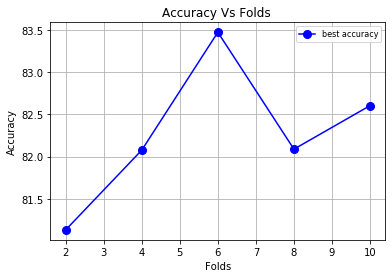

In [79]:
plt.plot(folds , mean_accuracy_kernel_folds, marker ='o', markersize = 8 ,  color ='blue',label='best accuracy')

plt.title("Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()

In [47]:
#Implementing random forests with best parameters 

from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(oob_score=True,random_state=42)
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [59]:
RF_param_Tuning = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='gini',max_features='auto',n_estimators=200)
RF_param_Tuning.fit(X_train, y_train)    

print("Accuracy for Random Forest after parameter tuning for train:",RF_param_Tuning.score(X_train,y_train)*100)
print("Accuracy for Random Forest after parameter tuning for test:",RF_param_Tuning.score(X_test,y_test)*100)

best_accuracy.append(RF_param_Tuning.score(X_test,y_test)*100)

Accuracy for Random Forest after parameter tuning for train: 97.64150943396226
Accuracy for Random Forest after parameter tuning for test: 76.92307692307693


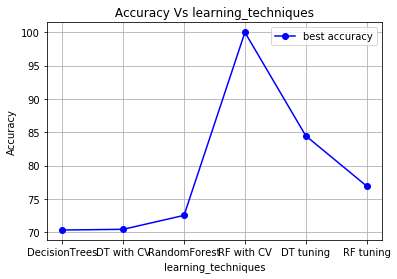

In [61]:
learning_techniques = ['DecisionTrees', 'DT with CV','RandomForest','RF with CV','DT tuning','RF tuning']

plt.plot(learning_techniques , best_accuracy , marker ='o', markersize = 6 , color ='blue',label='best accuracy')
plt.title(" Accuracy Vs learning_techniques ")
plt.xlabel("learning_techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
#Implementing XGboost
import xgboost as xgb

best_boosting_accuracy = []

XGB_model=xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)

print("Accuracy for XGboost for train:",XGB_model.score(X_train,y_train)*100)
print("Accuracy for XGboost for test:",XGB_model.score(X_test,y_test)*100)

best_boosting_accuracy.append(XGB_model.score(X_test,y_test)*100)

Accuracy for XGboost for train: 100.0
Accuracy for XGboost for test: 79.12087912087912


In [10]:
#Implementing XGboost with best parameters
from sklearn.model_selection import GridSearchCV

XGB_clf = xgb.XGBClassifier()
XGB_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}
CV_XGB = GridSearchCV(estimator=XGB_clf, param_grid=XGB_param_grid, cv= 3)
CV_XGB.fit(X_train, y_train)
CV_XGB.best_params_

C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'learning_rate': 0.6,
 'max_depth': 7,
 'min_child_weight': 0.001,
 'n_estimators': 2}

In [81]:
xgb_tuned_model=xgb.XGBClassifier(n_estimators=2,
                            min_child_weight=0.001,
                            max_depth=7,
                            learning_rate=0.6,
                            colsample_bytree=0.8,
                            booster='gbtree')
xgb_tuned_model.fit(X_train, y_train)

print("Accuracy for XGboost after tuning for train:",xgb_tuned_model.score(X_train,y_train)*100)
print("Accuracy for XGboost after tuning for test:",xgb_tuned_model.score(X_test,y_test)*100)

best_boosting_accuracy.append(xgb_tuned_model.score(X_test,y_test)*100)

Accuracy for XGboost after tuning for train: 96.69811320754717
Accuracy for XGboost after tuning for test: 75.82417582417582


In [82]:
#Implementing Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GB_model=GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

print("Accuracy for XGboost for train:",GB_model.score(X_train,y_train)*100)
print("Accuracy for XGboost for test:",GB_model.score(X_test,y_test)*100)

best_boosting_accuracy.append(GB_model.score(X_test,y_test)*100)

Accuracy for XGboost for train: 100.0
Accuracy for XGboost for test: 75.82417582417582


In [18]:
#Implementing Gradient Boosting with best parameters
GB_clf = GradientBoostingClassifier()
GB_param_grid = {
    'n_estimators': [2,3,5,7,10],
    'max_depth': [2,3,4,5,6],
    'learning_rate': [0.01,0.02,0.05,0.075,0.1,0.2]
}
CV_GB = GridSearchCV(estimator=GB_clf, param_grid=GB_param_grid, cv= 3)
CV_GB.fit(X_train, y_train)
CV_GB.best_params_

C:\Users\bhava\OneDrive\Documents\a\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 10}

In [83]:
tuned_gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.075, max_depth=3)
tuned_gb_clf.fit(X_train, y_train)

print("Accuracy for Gradient Boosting after tuning for train:",tuned_gb_clf.score(X_train,y_train)*100)
print("Accuracy for Gradient Boosting after tuning for test:",tuned_gb_clf.score(X_test,y_test)*100)

best_boosting_accuracy.append(tuned_gb_clf.score(X_test,y_test)*100)

Accuracy for Gradient Boosting after tuning for train: 89.15094339622641
Accuracy for Gradient Boosting after tuning for test: 70.32967032967034


In [84]:
best_boosting_accuracy

[79.12087912087912, 75.82417582417582, 75.82417582417582, 70.32967032967034]

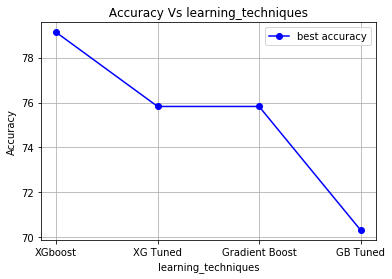

In [85]:
boosting_techniques = ['XGboost', 'XG Tuned','Gradient Boost','GB Tuned']

plt.plot(boosting_techniques , best_boosting_accuracy , marker ='o', markersize = 6 , color ='blue',label='best accuracy')
plt.title(" Accuracy Vs learning_techniques ")
plt.xlabel("learning_techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

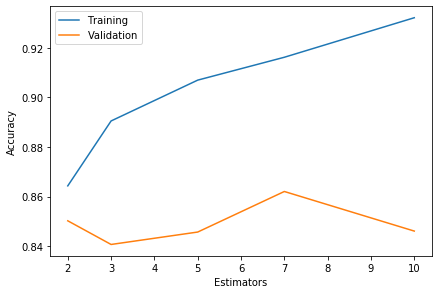

In [87]:
#Gradient Boosting to find the best parameters
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import validation_curve

GB_clf = GradientBoostingClassifier()
param_range = [2,3,5,7,10]
train_scores, valid_scores = validation_curve(GB_clf, X_train, y_train,
                                              "n_estimators",param_range,
                                              cv=5,scoring="f1")
train_mean = np.mean(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)

plt.plot(param_range, train_mean, label="Training")
plt.plot(param_range, valid_mean, label="Validation")
plt.tight_layout()
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

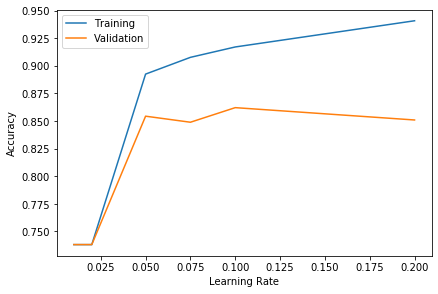

In [88]:
GB_clf = GradientBoostingClassifier(n_estimators=7)

param_range = [0.01,0.02,0.05,0.075,0.1,0.2]
train_scores, valid_scores = validation_curve(GB_clf, X_train, y_train,
                                              "learning_rate",param_range,
                                              cv=5,scoring="f1")

train_mean = np.mean(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)

plt.plot(param_range, train_mean, label="Training")
plt.plot(param_range, valid_mean, label="Validation")
plt.tight_layout()
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

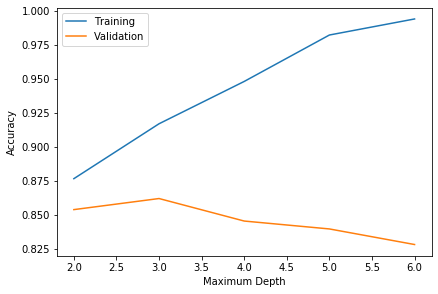

In [89]:
GB_clf = GradientBoostingClassifier(n_estimators=7, learning_rate=0.1)

param_range = [2,3,4,5,6]
train_scores, valid_scores = validation_curve(GB_clf, X_train, y_train,
                                              "max_depth",param_range,
                                              cv=5,scoring="f1")

train_mean = np.mean(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)

plt.plot(param_range, train_mean, label="Training")
plt.plot(param_range, valid_mean, label="Validation")
plt.tight_layout()
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()